In [1]:
import pandas as pd
import re,glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import seaborn as sns

# Preprocessing Data

In [16]:
def rename(path_name):
    path_name = re.search('[^\/]+$',path_name).group(0)
    return path_name[:-4]

def df_process(file):
    try:
        df = pd.read_csv(file,parse_dates=[['date', 'time']])
    except:
        df = pd.read_csv(file,parse_dates=['date'])
    df.replace({-999:np.nan},inplace=True)
    df['station'] = rename(file)
    try:
        df = df.set_index('date')['2012-01-01':]
    except:
        df = df.set_index('date_time')['2012-01-01':]
    
    
    return df

def open_concat_csv(folder_path):
    all_filenames = [i for i in glob.glob(os.path.join(folder_path, '*.csv'))]
    df = pd.concat([df_process(f) for f in all_filenames])
    return df

In [33]:
path_rain = "data/hii-telemetering-batch-data-master/rain2007-2020"
rain = open_concat_csv(path_rain)

print(rain.shape)
rain.head()

(2904958, 2)


,rain,station
date,,
2012-01-01,NaN,SWR028
2012-01-02,NaN,SWR028
2012-01-03,NaN,SWR028
2012-01-04,NaN,SWR028
2012-01-05,NaN,SWR028


In [34]:
# # Percent of missing data
# for yr in range(2007,2021):
#     data,total_datapoint = rain_df[(yr)].count()
#     print("avaliable data in *{}* is ........{:.2f}% || missing....{:.2f}%".format(yr,data*100/total_datapoint,data*100/total_datapoint-100))

In [35]:
df_rain = pd.DataFrame()
"""for name,group in rain_df.groupby('station'):
    if rain_df_st.empty:
        rain_df_st = group.set_index("date")[["rain"]].rename(columns={'rain':name})
    else:
        rain_df_st = rain_df_st.join(group.set_index("date")[["rain"]].rename(columns={'rain':name}))
"""
for name,group in rain.groupby('station'):
    if df_rain.empty:
        df_rain = group[["rain"]].rename(columns={'rain':name})
    else:
        df_rain = df_rain.join(group[["rain"]].rename(columns={'rain':name}))

print(df_rain.shape)
df_rain.head()

(3135, 929)


,ACRU,ANLI,BAKI,BARI,BBHN,BBON,BBUA,BBWN,BCAP,BCNG,...,YOM003,YOM004,YOM005,YOM006,YOM007,YOM008,YOM009,YOM010,YOM011,YOM012
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.0,0.0,0.0,0.0,18.2,0.2,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,0.0,0.0,0.0,14.8,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


* WATER Level data

In [36]:
path_water = "/home/song/Public/Song/Work/Thesis/data/hii-telemetering-batch-data-master/water-level2007-2020"
water = open_concat_csv(path_water)

print(water.shape)
print(water.columns)

KeyError: "None of ['date'] are in the columns"

In [ ]:
water.set_index('date',inplace=True)

water['wl'] = water['wl'].replace({-999:np.nan})
water.head()

In [ ]:
# # Check missing data
# for yr in range(2007,2021):
#     data,total_datapoint = water[str(yr)].count()
#     print("avaliable data in *{}* is ........{:.2f}% || missing....{:.2f}%".format(yr,data*100/total_datapoint,data*100/total_datapoint-100))

In [ ]:
water = water["2012-01-01":]
water.shape

In [ ]:
df_water = pd.DataFrame()
"""
for name,group in water_df.groupby('station'):
    if df_wl_st.empty:
        df_wl_st = group.set_index(["date_time"])[["wl"]].rename(columns={'wl':name})
    else:
        df_wl_st = df_wl_st.join(group.set_index(["date_time"])[["wl"]].rename(columns={'wl':name}))
"""
for name,group in water.groupby('station'):
    if df_water.empty:
        df_water = group[["wl"]].rename(columns={'wl':name})
    else:
        df_water = df_water.join(group[["wl"]].rename(columns={'wl':name}))

print(df_water.shape)     
df_water.head()

In [12]:
#df_rain.to_csv("data/rain.csv")
#df_water.to_csv('data/water.csv')

# Selected related station // Missing data Handle

In [13]:
filepath = ("../hii-telemetering-batch-data-master/")
water_st = pd.read_csv(filepath+"station_metadata-water-level.csv")
water_st = water_st.loc[(water_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]
#น้ำเหนือที่ส่งผลให้ภาคกลางเกิดน้ำท่วมคือ แม่น้ำปิง กับ น่าน เพราะฉะนั้นโฟกัสแค่สองแม่น้ำนี้เป็นหลัก


In [14]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
col = [i for i in water_st['code']]
#เช็คว่า ชื่อสถานีมีอยู่ในDBจริงก่อนใช้
col = intersection(col,df_water.columns)



In [15]:
df_water = df_water[col]
print(df_water.shape)
df_water.head()

(451440, 72)


,PIN005,BKK018,TB0006,BKK005,NAN004,NAN012,NAN002,CPY005,PIN001,DIV005,...,CPY007,CPY002,HDA005,TB0001,CPY014,KWN001,CHM002,BKK007,CPY003,PIN004
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
### NOTE: resample per 1 day, and check missing (result is all data mostly avaliable)
per_missing = 0.5
print("***From current station {} list below, find and discard station that too much missingdata \n".format(len(col)))
print("missing data over {}%, as below".format(per_missing))

for _col in df_water.columns:   
    _nan = df_water[_col].resample('d').mean()
    _nan = _nan.isnull().sum()
    _total = df_water.shape[0]
    if _nan*100/_total > per_missing:
        print("Station name {}, all.....{},missing......{} >>>..{:.2f}%".format(_col,_total,_nan,_nan*100/_total))
        #col.remove(_col)
print("remain .......{}...station".format(len(col)))

***From current station 72 list below, find and discard station that too much missingdata 

missing data over 0.5%, as below
remain .......72...station


In [17]:
# let's calcuate in daliy manner
df_water = df_water.resample('d').mean()

In [18]:
### NOTE: Hourly data; check missing (result is all data mostly avaliable)
"""print("***From current station {} list below, find and discard station that too much missingdata \n".format(len(col)))
print("missing data over 30%, as below")

for _col in df_wl_st_final.columns:   
    _nan = df_wl_st_final[_col].isnull().sum()
    _total = df_wl_st_final.shape[0]
    if _nan*100/_total > 30:
        print("Station name {}, all.....{},missing......{} >>>..{:.2f}%".format(_col,_total,_nan,_nan*100/_total))
        col.remove(_col)
print("remain .......{}...station".format(len(col)))"""

'print("***From current station {} list below, find and discard station that too much missingdata \n".format(len(col)))\nprint("missing data over 30%, as below")\n\nfor _col in df_wl_st_final.columns:   \n    _nan = df_wl_st_final[_col].isnull().sum()\n    _total = df_wl_st_final.shape[0]\n    if _nan*100/_total > 30:\n        print("Station name {}, all.....{},missing......{} >>>..{:.2f}%".format(_col,_total,_nan,_nan*100/_total))\n        col.remove(_col)\nprint("remain .......{}...station".format(len(col)))'

* rainstation selction

In [19]:
filepath = ("../hii-telemetering-batch-data-master/")
rain_st = pd.read_csv(filepath+"station_metadata-rain.csv")
rain_st = rain_st.loc[(rain_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]
# rain_st = rain_st.loc[(water_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]

In [41]:
col_rain = [i for i in rain_st['code']]
#เช็คว่า ชื่อสถานีมีอยู่ในDBจริงก่อนใช้
check_ = intersection(col_rain,.columns)
check_

NameError: name 'rain_st' is not defined

In [21]:
df_rain = df_rain[col_rain]
print(df_rain.shape)
df_rain.head()

(3135, 20)


,PIN005,TB0006,VLGE25,VLGE11,PIN001,DIV005,CHM006,CHM005,TBW008,CHM001,VLGE15,PIN003,PIN006,VLGE06,CHM004,TB0007,VLGE04,CHM002,PIN002,PIN004
date,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.2,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,0.2,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,2.6,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.2,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,0.0,NaN,NaN,NaN


In [22]:
print("***From current station {} list below, find and discard station that too much missingdata \n".format(len(col_rain)))
print("missing data over 30%, as below")

for _col in df_rain.columns:   
    _nan = df_rain[_col].isnull().sum()
    _total = df_rain.shape[0]
    if _nan*100/_total > 30:
        print("Station name {}, all.....{},missing......{} >>>..{:.2f}%".format(_col,_total,_nan,_nan*100/_total))
        col_rain.remove(_col)
print("remain .......{}...station".format(len(col_rain)))

***From current station 20 list below, find and discard station that too much missingdata 

missing data over 30%, as below
Station name TB0006, all.....3135,missing......1616 >>>..51.55%
Station name VLGE25, all.....3135,missing......1173 >>>..37.42%
Station name VLGE11, all.....3135,missing......1481 >>>..47.24%
Station name TBW008, all.....3135,missing......2097 >>>..66.89%
Station name VLGE15, all.....3135,missing......1345 >>>..42.90%
Station name VLGE06, all.....3135,missing......2079 >>>..66.32%
Station name TB0007, all.....3135,missing......1616 >>>..51.55%
Station name VLGE04, all.....3135,missing......975 >>>..31.10%
remain .......12...station


# Combine rain and water lv. data

In [23]:
print("rain....",df_rain.shape)
print("water...",df_water.shape)
df = pd.concat([df_rain,df_water],axis=1)
print("total...",df.shape)
df.head()

rain.... (3135, 20)
water... (3135, 72)
total... (3135, 92)


,PIN005,TB0006,VLGE25,VLGE11,PIN001,DIV005,CHM006,CHM005,TBW008,CHM001,...,CPY007,CPY002,HDA005,TB0001,CPY014,KWN001,CHM002,BKK007,CPY003,PIN004
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ARIMA _Trial01

In [ ]:
bkkwater = df['CPY014']["2013-01-01":"2014-09-01"]
#bkkwater = water['CPY014']["2013-01-01":"2014-09-01"]
fig,ax = plt.subplots(figsize=(20,7))
#plt.plot(bkkwater.fillna(0),ax=ax[0])
#plt.scatter(x=bkkwater.reset_index()['index'],y=bkkwater.reset_index()['CPY014'],ax=ax[1])
sns.lineplot(data=bkkwater.fillna(0),ax=ax)
#sns.relplot(x="index", y="CPY014", data=bkkwater.reset_index(),ax=ax[1])

#g = sns.relplot(x="index", y="CPY014", data=bkkwater.reset_index())
#g.fig.autofmt_xdate()
plt.show()


"""
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('GWh')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
"""

In [ ]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    
    print(df_results)
    
    #extra
    if df_results[1] <= 0.05:
        print("strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a  unit root, indicating it is non-stationary")
        
test_stationarity(bkkwater.dropna())

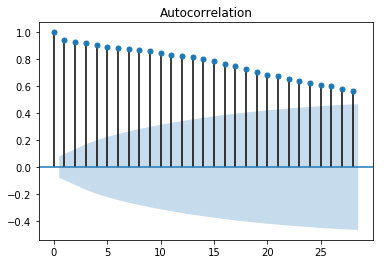

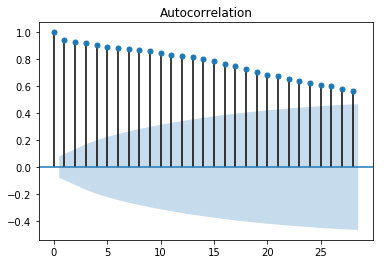

In [27]:
plot_acf(bkkwater.dropna())

In [28]:
def diff(df,shif=1):
    return df-df.shift(shif)
diff(bkkwater,1).dropna().head()


2013-01-02   -0.137009
2013-01-03   -0.055625
2013-01-04   -0.070833
2013-01-05    0.008056
2013-01-06   -0.209583
Name: CPY014, dtype: float64

Test Statistic           -3.866244
p-value                   0.002298
Lags                     18.000000
Observations            585.000000
Critical Value (1%)      -3.441578
Critical Value (5%)      -2.866493
Critical Value (10%)     -2.569408
dtype: float64
strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


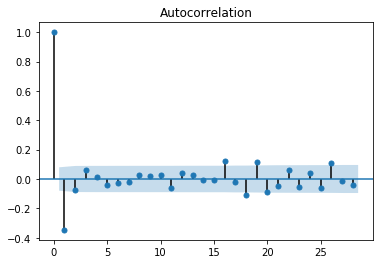

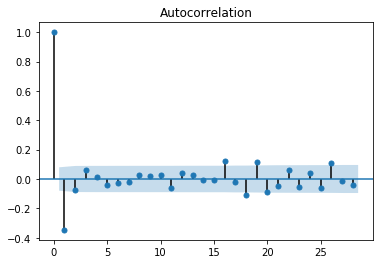

In [29]:
test_stationarity(diff(bkkwater,1).dropna())
plot_acf(diff(bkkwater,1).dropna()) 

In [30]:
"""from statsmodels.tsa.ar_model import AR

model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=int((X.size)*.7),end=X.size)

plt.plot(test)
plt.plot(predictions,color='red')
#print(mean_squared_error(test,predictions))
plt.show()"""

"from statsmodels.tsa.ar_model import AR\n\nmodel_ar = AR(train)\nmodel_ar_fit = model_ar.fit()\npredictions = model_ar_fit.predict(start=int((X.size)*.7),end=X.size)\n\nplt.plot(test)\nplt.plot(predictions,color='red')\n#print(mean_squared_error(test,predictions))\nplt.show()"

# ARIMA copycode


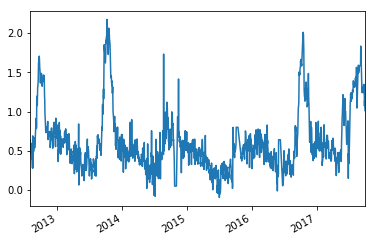

In [31]:
bkkwater = df['CPY014']["2012-08-01":"2017-10-01"]
y = bkkwater.interpolate(method='pad', limit=10).dropna()
y.plot()

In [32]:
X = y.values
np.isnan(X.sum())

False

In [33]:
#Interpolation missing value

size = int(len(X) * 0.66)
train, test = X[0:size-1], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()             ###
	output = model_fit.forecast()       ###
	yhat = output[0]
	predictions.append(yhat)            ###
	obs = test[t]
	history.append(obs)
	#print(t,'....predicted=%f, expected=%f' % (yhat, obs))

/home/song/anaconda3/envs/tensor/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Test MSE: 0.010


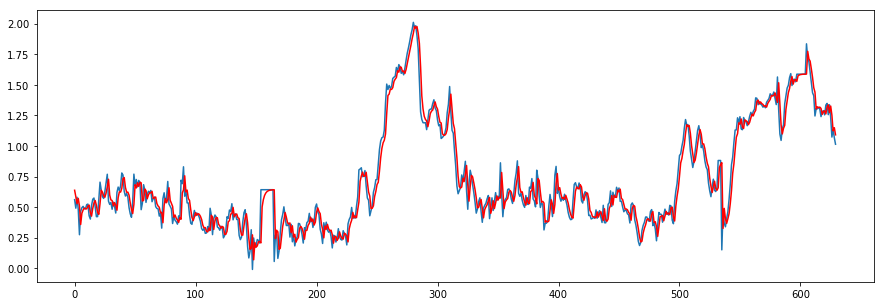

In [34]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.figure(figsize=(15,5))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

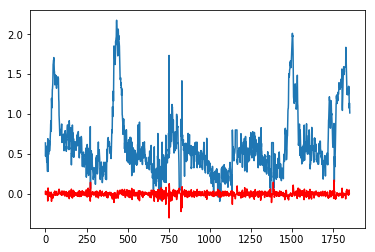

In [35]:
plt.plot(y.values)
plt.plot(model_fit.fittedvalues, color='red')
plt.show()

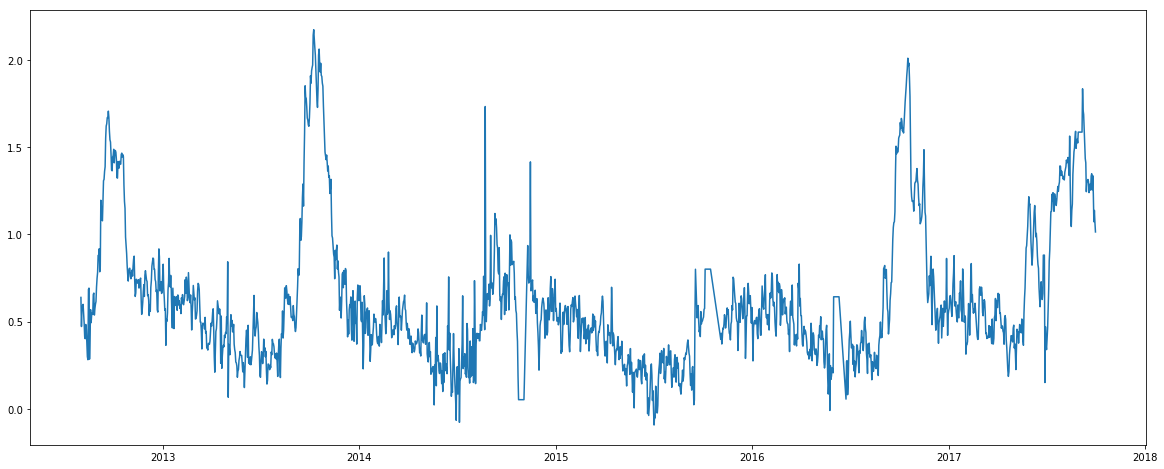

In [36]:
fig = plt.figure(figsize=(20,8))
x = model_fit.predict(start=(len(X)), end=(len(X)+7), dynamic=False)

plt.plot(y)
#plt.plot(x, color='r')

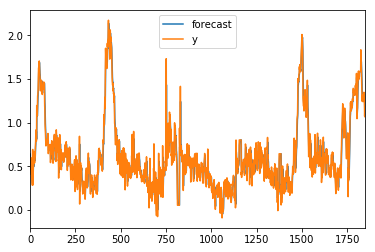

In [37]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [38]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1849
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1469.342
Method:                       css-mle   S.D. of innovations              0.109
Date:                Mon, 19 Oct 2020   AIC                          -2930.684
Time:                        14:59:44   BIC                          -2908.595
Sample:                             1   HQIC                         -2922.541
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.164      0.869      -0.003       0.004
ar.L1.D.y      0.2899      0.088      3.298      0.001       0.118       0.462
ma.L1.D.y     -0.5388      0.078     -6.879      0.0

In [39]:
# Best Parameter

import itertools
import warnings
#p=d=q=range(0,10)
#pdq = list(itertools.product(p,d,q))

p=q=range(0,10)
d=range(1,4) # fix d = 1 or 2
pdq = itertools.product(p,d,q)

aic_result =999999
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        if model_arima_fit.aic < aic_result:
            aic_result = model_arima_fit.aic
            print(param,model_arima_fit.aic)
    except:
        continue

(0, 1, 0) -1703.339967685201
(0, 1, 1) -1825.7449378626807
(0, 1, 2) -1836.1827458901362
(0, 1, 3) -1836.7003854544737
(0, 1, 6) -1838.4381696176533
(3, 1, 4) -1842.7871647805996
(4, 1, 2) -1844.352035529545
(4, 1, 6) -1846.3590756689946
(4, 1, 7) -1846.5112990591379
(5, 1, 3) -1848.112044222461
(5, 1, 5) -1849.0487274808702
(6, 1, 6) -1853.1612524308966
(8, 1, 7) -1857.1647796422303


# ARIMA Copy 2

                              ARMA Model Results                              
Dep. Variable:                 CPY014   No. Observations:                 1852
Model:                     ARMA(1, 0)   Log Likelihood                1430.019
Method:                       css-mle   S.D. of innovations              0.112
Date:                Mon, 19 Oct 2020   AIC                          -2854.037
Time:                        15:15:29   BIC                          -2837.465
Sample:                             0   HQIC                         -2847.928
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6246      0.063      9.987      0.000       0.502       0.747
ar.L1.CPY014     0.9590      0.007    146.969      0.000       0.946       0.972
                                    Roots   

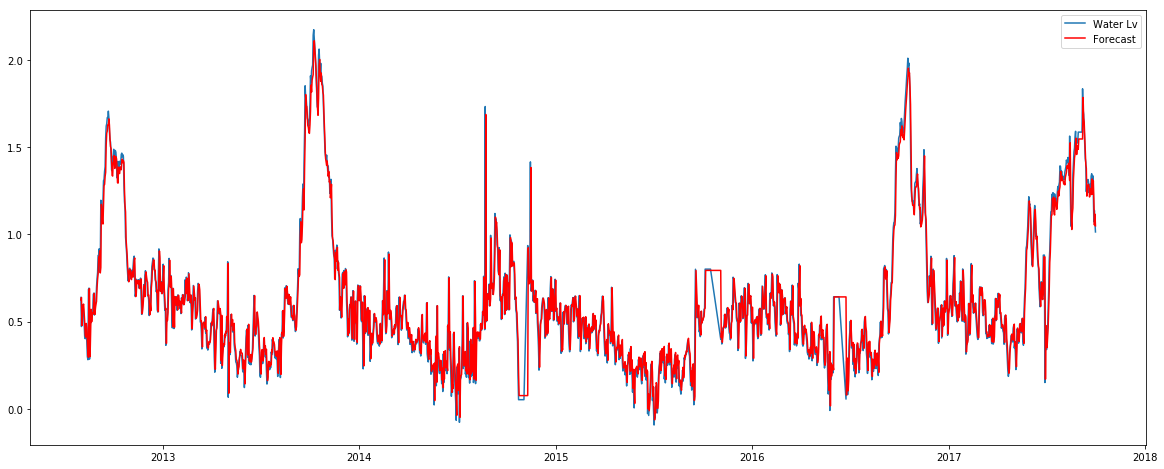

In [40]:
fig = plt.figure(figsize=(20,8))

model = ARIMA(y, order=(1,0,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(y)
plt.plot(results.fittedvalues, color='red')
ax.legend(['Water Lv', 'Forecast'])
print(results.summary())


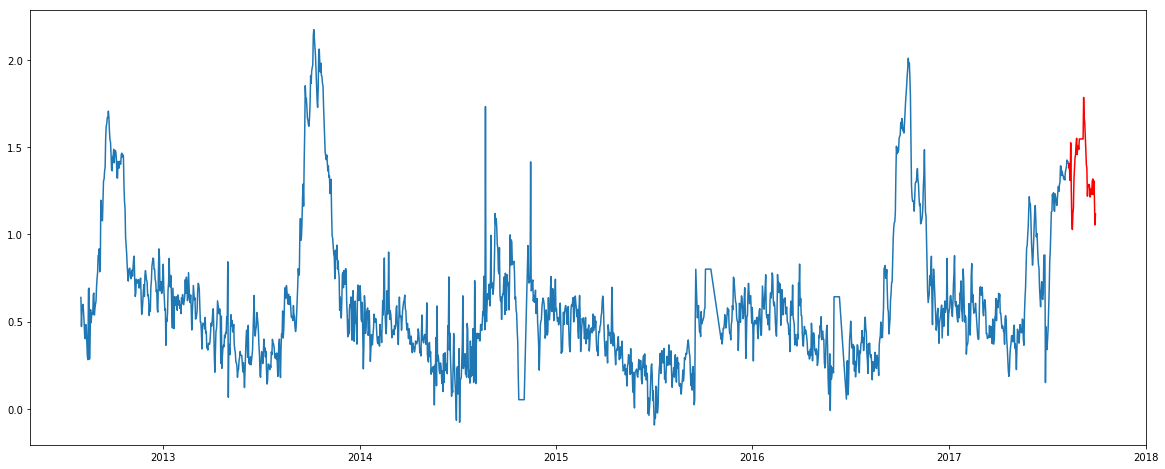

In [41]:
fig = plt.figure(figsize=(20,8))
x = results.predict(start=(1800), end=(1850), dynamic=False)

plt.plot(y[:1800])
plt.plot(x, color='r')

In [42]:
#LSTM Mask zero
#model = Sequential()
#model.add(Masking(mask_value=0., input_shape=(timesteps, features))) 
#model.add(LSTM(32))

# Wavlet ANN


In [43]:
import pywt

# Define Input
bkkwater = df['CPY014']["2012-08-01":"2017-10-01"]
#y = bkkwater.interpolate(method='pad', limit=10).dropna()
X = bkkwater.values
#np.isnan(X.sum())

In [44]:
#lv = int(np.log(len(X)))
lv = pywt.dwt_coeff_len(len(X))

TypeError: dwt_coeff_len() missing 2 required positional arguments: 'filter_len' and 'mode'

In [67]:
cA,cD = pywt.dwt(x,'db1', level=lv)
wa_y = pywt.idwt(cA,cD, 'db1', level=lv)

TypeError: dwt() got an unexpected keyword argument 'level'

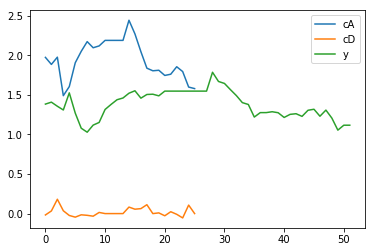

In [64]:
plt.plot(cA)
plt.plot(cD)
plt.plot(wa_y)
plt.legend(['cA','cD','y'])
plt.show()

array([1.97402811, 1.88493106, 1.97657104, 1.49002206, 1.60487814,
       1.90583967, 2.05022209, 2.17294244, 2.09558191, 2.11869308,
       2.18865721, 2.18865721, 2.18865721, 2.18865721, 2.44315018,
       2.27048004, 2.04559952, 1.83756199, 1.80451859, 1.81118583,
       1.74563452, 1.76103342, 1.85545899, 1.79472804, 1.59875625,
       1.57943099])